In [ ]:
pip install -U textblob

In [ ]:
from textblob import TextBlob

In [ ]:
pip install emoji

     |████████████████████████████████| 184 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=0ab0c70025c49b199812cdb7462100f1bac922c3146b76ef14a4e394aff0ef86
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [ ]:
import pandas as pd
import re
import multiprocessing
import nltk
import numpy as np
import os
import random
from nltk import TweetTokenizer 
from numpy import array
from numpy import mean 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/IHSIP/cleaned_22676_Aug_5.xlsx', index_col=0)
df

,postid,username,comment,dataset
0,B7--VEMJWfD,fallschrimjager_,👏👏👏😍😍😍,1
1,B7--VEMJWfD,djmackjp,Thank you! 🙏,1
2,B7--VEMJWfD,fandee_g,👍👍👍,1
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1
4,B7--VEMJWfD,iam_y0y0,🔥🔥🔥,1
...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile 😍😍,2
22672,CEZZyqshFLq,sachuhan,Nice smile,2
22673,CEZZyqshFLq,sadiqulamine,😍❤🌺🌸🌺🌸,2
22674,CEZZyqshFLq,qasimchohanqasimchohan,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,2


In [ ]:
import emoji
emolist = []
ex = 'I 😍 love ❤ you 🌺 more 🌸than 🌺 anything🌸'
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

for i in range(22676):
  temp = extract_emojis(df['comment'][i])
  if temp != '':
    emolist.extend(temp)

print(emolist)

['👏', '👏', '👏', '😍', '😍', '😍', '🙏', '👍', '👍', '👍', '🔥', '🔥', '🔥', '👏', '👏', '😍', '👏', '👏', '👍', '👍', '👍', '👏', '🏼', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '👍', '🏻', '😂', '😹', '😹', '😹', '😍', '😍', '😍', '😍', '😭', '🖤', '🖤', '🖤', '😅', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😁', '😁', '😁', '👏', '👏', '👏', '😍', '😍', '😍', '🙌', '🏻', '😢', '😢', '😢', '😁', '🙏', '😂', '😂', '😂', '😂', '✨', '✨', '🔥', '🤣', '🤣', '🤣', '🦍', '🦍', '🦍', '🦍', '🦍', '🦍', '🙏', '💦', '🏺', '👊', '🔥', '🙏', '🏾', '❤', '🙏', '🏻', '♥', '🙏', '🙏', '❤', '❤', '🙏', '🏽', '🙏', '💛', '💛', '💛', '🙏', '🙏', '🏾', '🤗', '🤣', '🤣', '🤣', '😂', '😂', '😂', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '😂', '😂', '😂', '😂', '🤣', '😂', '🤣', '😂', '🤣', '😂', '🤣', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '🤣', '😂', '😂', '👏', '😯', '😂', '😂', '😂', '😮', '😂', '😂', '😂', '😂', '😂', '😄', '🤣', '🤣', '👉', '👌', '😂', '😂', '😅', '😅', '😱', '😱', '😂', '😂', '😯', '😨', '😐', '😐', '😂', '😂', '❤', '❤', '❤', '❤', '😅', '😲', '😲', '😲', '😥', '😳', '😂', '😂', '😷', '😷', '😍', '😍', '😍', '😜', '😜',

{'😂😂😂❤🐶🐾',
 '🔥🤩🤩',
 '💓😍🔥',
 '😂😂👌🏻👌🏻',
 '✨🤩💪🏼',
 '🔥👌👌❤👌',
 '💞💞❣',
 '👊👊👊👊👊👊',
 '😃😃',
 '❤✝🙏💛😘🙏✝',
 '💓💓',
 '🙏😘',
 '💕🙏🏽',
 '🥵🥴',
 '🤩💪🏻',
 '💗👌',
 '📩',
 '😘😘😘😘😘😘',
 '😍♥😍',
 '💚💦😆',
 '😍😍💕💕💥💥',
 '😭😭😂😂',
 '🤩🤤🤤',
 '✊',
 '💪👊',
 '❤😘',
 '😌😌😌😌😌',
 '🆒😂',
 '🔥😍😍😍',
 '👏🏼♥',
 '🤪👍🏻🤙🏻',
 '😅😅😅😅',
 '😍😍😍😍😍😘😘😘😘',
 '🔥⚡',
 '💐💐💐💐💘',
 '🔥🔥🔥🔥😍',
 '😍',
 '💕😊',
 '👏👏👏😂😂😂',
 '😷💪🙌👏',
 '👏🏻👏🏻👏🏻👏🏻👏🏻♥♥',
 '👏👏💞😍😘',
 '💪🏼💪🏼💪🏼💪🏼',
 '🔥🦠👏🏻',
 '😢😢😢😂😮😮😍😢😢😂',
 '😘😻',
 '😍😍👍👍',
 '😎🤘',
 '😱😱😱😱😱',
 '👏🏾👏🏾👏🏾',
 '⚠',
 '😏',
 '❤🌹❤',
 '😡😡😡😡😡😡🙌🏼🙌🏼',
 '🔥🔥🔥♥',
 '😅😅😅',
 '👏👏👏👏😂😂😂',
 '🙄🙄🙄',
 '🙏🙏🏼🙏',
 '📷😍🙏',
 '🔥💪🏽💪🏽💥💪🏽',
 '🥺🥺🥺',
 '👏🏼😍❤',
 '❤👀🔥❤',
 '👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼',
 '📸📸📸👍🏼',
 '😂😂😂😂😂😂💯',
 '😍❤🙏',
 '👍👍',
 '💕🍀💕',
 '😍🦁',
 '🔥😍🔥',
 '😻😻😻',
 '✨❤✨',
 '🍾',
 '🙏🏼🙏🏼🙏🏼💪🏽💪🏽💪🏽💪🏽💯💯💯',
 '😘💖💖💖',
 '😆🕺🏻',
 '🙌😢❤',
 '😍😍😍👍',
 '🧡💝🔥',
 '🎭🎭',
 '👏🏽',
 '🔝✌😃',
 '🤔😂',
 '💪💪',
 '💕💕💕💕💕',
 '😆👏',
 '❤🤙🔥',
 '😮😮😮😮😮',
 '😷👋',
 '😎💪🙌🏻',
 '🐾🐾',
 '🙏❤🌸',
 '🦁💪',
 '🔥🔥😍😍😍',
 '❤💌📷',
 '💝💝💝💝',
 '😲🤗😊😊',
 '😍💚💙',
 '🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏',
 '👍🏾👍🏾👍🏾',
 '👍🏼',
 '👺👺👺👺👹🤫',
 '🙏🙏🙌🙌',
 '👑👑👑',
 '❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤

In [ ]:
# df['comment'] = [re.sub('\s*@\s*\s?', ' ', str(sent)) for sent in df['comment']]

# df['comment'] = [re.sub('\?', ' ', str(sent)) for sent in df['comment']]

# df['comment'] = [re.sub('\_', ' ', str(sent)) for sent in df['comment']]

# df['comment'] = [re.sub('@"[\d-]"', ' ', str(sent)) for sent in df['comment']]
# # Remove new line characters
# df['comment'] = [re.sub('\s+', ' ', str(sent)) for sent in df['comment']]

# # Remove distracting single quotes
# df['comment'] = [re.sub("\'", " ", str(sent)) for sent in df['comment']]
# df['comment']=df['comment'].str.lower()
def clean_text_initial(text):
    text = ' '.join([x.lower() for x in word_tokenize(text) if x.lower() not in unwanted_list and len(x)>1])
    text = ' '.join([x.lower() for x in word_tokenize(text) if nltk.pos_tag([x])[0][1].startswith("NN") or nltk.pos_tag([x])[0][1].startswith("JJ")])
    return text.strip()

In [ ]:
import pandas as pd
import numpy as np


from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import string

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
punctuations = list(set(string.punctuation))
unwanted_list=punctuations+stopwords_list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import emoji
# Demojize all comments
demojize_comment = []
for c in df['comment']:
  demojize_comment.append(emoji.demojize(c))
df['cleaned_comment']=demojize_comment
df

,postid,username,comment,dataset,cleaned_comment
0,B7--VEMJWfD,fallschrimjager_,👏👏👏😍😍😍,1,:clapping_hands::clapping_hands::clapping_hand...
1,B7--VEMJWfD,djmackjp,Thank you! 🙏,1,Thank you! :folded_hands:
2,B7--VEMJWfD,fandee_g,👍👍👍,1,:thumbs_up::thumbs_up::thumbs_up:
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1,#fx_hdr #igworldclub_edits #total_editpics #ph...
4,B7--VEMJWfD,iam_y0y0,🔥🔥🔥,1,:fire::fire::fire:
...,...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile 😍😍,2,Nice smile :smiling_face_with_heart-eyes::smil...
22672,CEZZyqshFLq,sachuhan,Nice smile,2,Nice smile
22673,CEZZyqshFLq,sadiqulamine,😍❤🌺🌸🌺🌸,2,:smiling_face_with_heart-eyes::red_heart::hibi...
22674,CEZZyqshFLq,qasimchohanqasimchohan,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,2,:bouquet::bouquet::bouquet::bouquet::bouquet::...


In [ ]:
df["cleaned_comment"]=df.cleaned_comment.apply(lambda text:clean_text_initial(str(text)))
df

,postid,username,comment,dataset,cleaned_comment
0,B7--VEMJWfD,fallschrimjager_,👏👏👏😍😍😍,1,clapping_hands clapping_hands clapping_hands s...
1,B7--VEMJWfD,djmackjp,Thank you! 🙏,1,thank folded_hands
2,B7--VEMJWfD,fandee_g,👍👍👍,1,thumbs_up thumbs_up thumbs_up
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1,fx_hdr igworldclub_edits total_editpics photo_...
4,B7--VEMJWfD,iam_y0y0,🔥🔥🔥,1,fire fire fire
...,...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile 😍😍,2,nice smile smiling_face_with_heart-eyes smilin...
22672,CEZZyqshFLq,sachuhan,Nice smile,2,nice smile
22673,CEZZyqshFLq,sadiqulamine,😍❤🌺🌸🌺🌸,2,smiling_face_with_heart-eyes red_heart hibiscu...
22674,CEZZyqshFLq,qasimchohanqasimchohan,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,2,bouquet bouquet bouquet bouquet bouquet cool s...


In [ ]:
for i in range(22676):
  df['cleaned_comment'][i] = df['cleaned_comment'][i].replace("_", " ")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,postid,username,comment,dataset,cleaned_comment
0,B7--VEMJWfD,fallschrimjager_,👏👏👏😍😍😍,1,clapping hands clapping hands clapping hands s...
1,B7--VEMJWfD,djmackjp,Thank you! 🙏,1,thank folded hands
2,B7--VEMJWfD,fandee_g,👍👍👍,1,thumbs up thumbs up thumbs up
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1,fx hdr igworldclub edits total editpics photo ...
4,B7--VEMJWfD,iam_y0y0,🔥🔥🔥,1,fire fire fire
...,...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile 😍😍,2,nice smile smiling face with heart-eyes smilin...
22672,CEZZyqshFLq,sachuhan,Nice smile,2,nice smile
22673,CEZZyqshFLq,sadiqulamine,😍❤🌺🌸🌺🌸,2,smiling face with heart-eyes red heart hibiscu...
22674,CEZZyqshFLq,qasimchohanqasimchohan,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,2,bouquet bouquet bouquet bouquet bouquet cool s...


In [ ]:
bloblist_desc = list()

df_comments=df['comment'].astype(str)
for row in df_comments:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_comments_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_comments_polarity_desc):
    print(df_comments_polarity_desc['sentiment'])
    if df_comments_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_comments_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_comments_polarity_desc['Sentiment_Type'] = df_comments_polarity_desc.apply(f, axis=1)

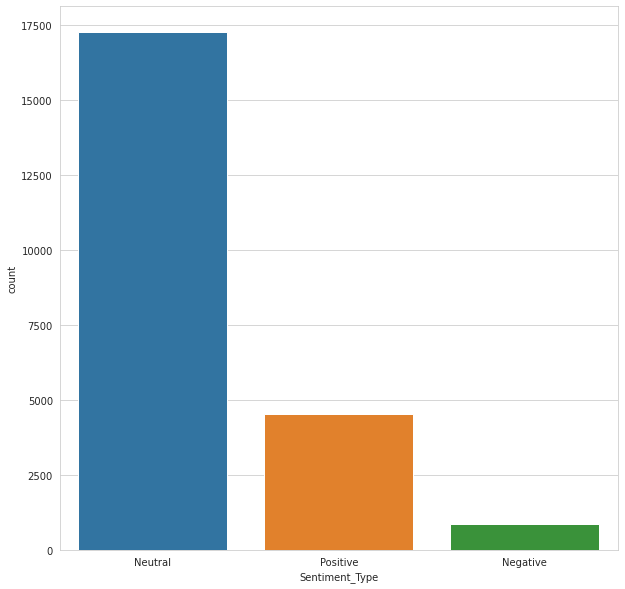

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_comments_polarity_desc)

In [ ]:
df_comments_polarity_desc['postid'] = df['postid']
df_comments_polarity_desc['username'] = df['username']

In [ ]:
df_comments_polarity_desc.to_csv('/content/drive/MyDrive/IHSIP/textblob_sentiment_new.csv')

In [ ]:
df_comments_polarity_desc['Sentiment_Type'].value_counts()

Neutral     17267
Positive     4538
Negative      871
Name: Sentiment_Type, dtype: int64

In [ ]:
df['comment']

0        :clapping_hands::clapping_hands::clapping_hand...
1                                thank you! :folded_hands:
2                        :thumbs_up::thumbs_up::thumbs_up:
3        #fx hdr #igworldclub edits #total editpics #ph...
4                                       :fire::fire::fire:
                               ...                        
22671    nice smile :smiling_face_with_heart-eyes::smil...
22672                                           nice smile
22673    :smiling_face_with_heart-eyes::red_heart::hibi...
22674    :bouquet::bouquet::bouquet::bouquet::bouquet::...
22675                super nice:OK_hand::OK_hand::OK_hand:
Name: comment, Length: 22676, dtype: object

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 9.7 MB/s 


In [ ]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [ ]:
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # Polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary,
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # Decide sentiment as positive, negative or neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive\n")
        return 2
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative\n")
        return 0
  
    else : 
        print("Neutral\n")
        return 1

In [ ]:
compound_scores = []
labels = []
for i in df['cleaned_comment']:
  print(i)
  #score = sentiment_scores(i)
  sid_obj = SentimentIntensityAnalyzer() 
  
  # Polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary,
  # which contains pos, neg, neu, and compound scores. 
  sentiment_dict = sid_obj.polarity_scores(i) 
  compound_score = sentiment_dict['compound']
  label = sentiment_scores(i)
  labels.append(label)
  compound_scores.append(compound_score)
df['label'] = labels
df['score'] = compound_scores
df['label'].value_counts()

Streaming output truncated to the last 5000 lines.
Sentence Overall Rated As Neutral

price
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

fire
Overall sentiment dictionary is :  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.34}
sentence was rated as  100.0 % Negative
sentence was rated as  0.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative

price
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

much pic
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
se

2    12097
1     7881
0     2698
Name: label, dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/IHSIP/vader_sentiment_new.csv')
df

,postid,username,comment,dataset,cleaned_comment,label,score
0,B7--VEMJWfD,fallschrimjager_,👏👏👏😍😍😍,1,clapping hands clapping hands clapping hands s...,2,0.8402
1,B7--VEMJWfD,djmackjp,Thank you! 🙏,1,thank folded hands,2,0.3612
2,B7--VEMJWfD,fandee_g,👍👍👍,1,thumbs up thumbs up thumbs up,1,0.0000
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1,fx hdr igworldclub edits total editpics photo ...,2,0.9593
4,B7--VEMJWfD,iam_y0y0,🔥🔥🔥,1,fire fire fire,0,-0.7351
...,...,...,...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile 😍😍,2,nice smile smiling face with heart-eyes smilin...,2,0.8834
22672,CEZZyqshFLq,sachuhan,Nice smile,2,nice smile,2,0.6486
22673,CEZZyqshFLq,sadiqulamine,😍❤🌺🌸🌺🌸,2,smiling face with heart-eyes red heart hibiscu...,2,0.8020
22674,CEZZyqshFLq,qasimchohanqasimchohan,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,2,bouquet bouquet bouquet bouquet bouquet cool s...,2,0.5859


In [ ]:
df_comments_polarity_desc

NameError: ignored

In [ ]:
temp = df_comments_polarity_desc['postid'][0]
textblob_average_score = []
count = 0
sum = 0
for i in range(22676):
  if df_comments_polarity_desc['postid'][i] == temp:
    sum += df_comments_polarity_desc['sentiment'][i]
    count += 1
  else:
    score = sum/count
    textblob_average_score.append(score)
    sum = df_comments_polarity_desc['sentiment'][i]
    count = 1
    temp = df_comments_polarity_desc['postid'][i]


In [ ]:
len(textblob_average_score)

4071

In [ ]:
temp = df['postid'][0]
postidlist = []
vader_average_score = []
count = 0
sum = 0
for i in range(22676):
  if df['postid'][i] == temp:
    sum += df['score'][i]
    count += 1
  else:
    score = sum/count
    vader_average_score.append(score)
    postidlist.append(df['postid'][i])
    sum = df['score'][i]
    count = 1
    temp = df['postid'][i]

In [ ]:
len(vader_average_score)
len(postidlist)

4071

In [ ]:
postidlist = df['postid'].unique()
postidlist

array(['B7--VEMJWfD', 'B7-15BuDTF4', 'B7-2BcyBi1N', ..., 'CEZxrfolBLL',
       'CEZZuT-pV1-', 'CEZZyqshFLq'], dtype=object)

In [ ]:
df_average = pd.DataFrame({'postid':postidlist, 'vader_average_score': vader_average_score, 'textblob_average_score':textblob_average_score})

In [ ]:
df_average

,postid,vader_average_score,textblob_average_score
0,B7-15BuDTF4,0.244362,0.042361
1,B7-2BcyBi1N,0.210050,0.000000
2,B7-2iwIHJ3X,0.000000,0.000000
3,B7-3_dwHkKC,0.000000,0.000000
4,B7-3xbQnEXu,0.000000,-0.150000
...,...,...,...
4066,CEZwLk0lDxR,0.206260,0.078472
4067,CEZwqRLpKRA,0.000000,0.000000
4068,CEZxrfolBLL,0.000000,0.000000
4069,CEZZuT-pV1-,-0.025800,-0.150000


In [ ]:
df_average.to_excel('/content/drive/MyDrive/IHSIP/average_score_new.xlsx')